In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

In [10]:
import pickle
with open('/content/drive/My Drive/Colab Notebooks/data/data.pkl', 'rb') as file:
  data = pickle.load(file)
data.head(3)

,Unnamed: 0,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,Customer Country,Customer Email,Customer Fname,Customer Id,Customer Lname,Customer Password,Customer Segment,Customer State,Customer Street,Customer Zipcode,Department Id,Department Name,Latitude,Longitude,Market,Order City,Order Country,Order Customer Id,Order Id,Order Item Cardprod Id,Order Item Discount,Order Item Discount Rate,Order Item Id,Order Item Product Price,Order Item Profit Ratio,Order Item Quantity,Sales,Order Item Total,Order Profit Per Order,Order Region,Order State,Order Status,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Image,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode,Customer Fullname,order_year,order_month,order_weekday,order_hour,order_month_year
0,0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,73,Sporting Goods,Caguas,Puerto Rico,XXXXXXXXX,Cally,20755,Holloway,XXXXXXXXX,Consumer,PR,5365 Noble Nectar Island,725.0,2,Fitness,18.251453,-66.037056,Pacific Asia,Bekasi,Indonesia,20755,77202,1360,13.110000,0.04,180517,327.75,0.29,1,327.75,314.640015,91.250000,Southeast Asia,Java Occidental,COMPLETE,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,2/3/2018 22:56,Standard Class,CallyHolloway,2018,1,2,22,2018-01
1,1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,73,Sporting Goods,Caguas,Puerto Rico,XXXXXXXXX,Irene,19492,Luna,XXXXXXXXX,Consumer,PR,2679 Rustic Loop,725.0,2,Fitness,18.279451,-66.037064,Pacific Asia,Bikaner,India,19492,75939,1360,16.389999,0.05,179254,327.75,-0.80,1,327.75,311.359985,-249.089996,South Asia,RajastÃ¡n,PENDING,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/18/2018 12:27,Standard Class,IreneLuna,2018,1,5,12,2018-01
2,2,CASH,4,4,-247.779999,309.720001,Shipping on time,0,73,Sporting Goods,San Jose,EE. UU.,XXXXXXXXX,Gillian,19491,Maldonado,XXXXXXXXX,Consumer,CA,8510 Round Bear Gate,95125.0,2,Fitness,37.292233,-121.881279,Pacific Asia,Bikaner,India,19491,75938,1360,18.030001,0.06,179253,327.75,-0.80,1,327.75,309.720001,-247.779999,South Asia,RajastÃ¡n,CLOSED,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/17/2018 12:06,Standard Class,GillianMaldonado,2018,1,5,12,2018-01


对销量进行预测（回归任务）

对订单数量进行预测

In [11]:
# 特征选择
data.drop(['Customer Email', 'Customer Fname', 'Customer Id', 'Customer Lname', 'Customer Password',
    'Order Zipcode', 'Product Card Id', 'Product Category Id', 'Product Description', 'Product Status',
    'Product Image', 'Customer Zipcode', 'Order Status', 'Delivery Status', 'Longitude', 'Latitude', 
    'Customer Street', 'Order Item Id', 'Late_delivery_risk'], axis=1, inplace=True)
#data.info()

# 再次去除多余的项
data.drop(['Order Profit Per Order', 'Order Item Total', 'Product Price', 'Order Item Cardprod Id',
    'Order Id', 'Sales per customer', 'Unnamed: 0'], axis=1, inplace=True)

# 查看object特征
cat_cols = data.select_dtypes(include='object').columns
num_cols = data.select_dtypes(exclude='object').columns
data['Customer Fullname'] = data['Customer Fullname'].astype('str')
# LabelEncoder 
le = LabelEncoder()
for col in cat_cols:
  #print(col)
  data[col] = le.fit_transform(data[col])
data.head(3)

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Category Id,Category Name,Customer City,Customer Country,Customer Segment,Customer State,Department Id,Department Name,Market,Order City,Order Country,Order Customer Id,Order Item Discount,Order Item Discount Rate,Order Item Product Price,Order Item Profit Ratio,Order Item Quantity,Sales,Order Region,Order State,Product Name,shipping date (DateOrders),Shipping Mode,Customer Fullname,order_year,order_month,order_weekday,order_hour,order_month_year
0,1,3,4,91.250000,73,40,66,1,0,36,2,4,3,331,70,20755,13.110000,0.04,327.75,0.29,1,327.75,15,475,78,27149,3,1875,2018,1,2,22,36
1,3,5,4,-249.089996,73,40,66,1,0,36,2,4,3,391,69,19492,16.389999,0.05,327.75,-0.80,1,327.75,13,841,78,2209,3,5374,2018,1,5,12,36
2,0,4,4,-247.779999,73,40,452,0,0,5,2,4,3,391,69,19491,18.030001,0.06,327.75,-0.80,1,327.75,13,841,78,1980,3,4426,2018,1,5,12,36


In [ ]:
# 星期几数值大小无意义，做one-hot encoder
#data['order_weekday'].value_counts()
#data['order_weekday'] = 
#data['order_year'].value_counts()

(180519, 33)

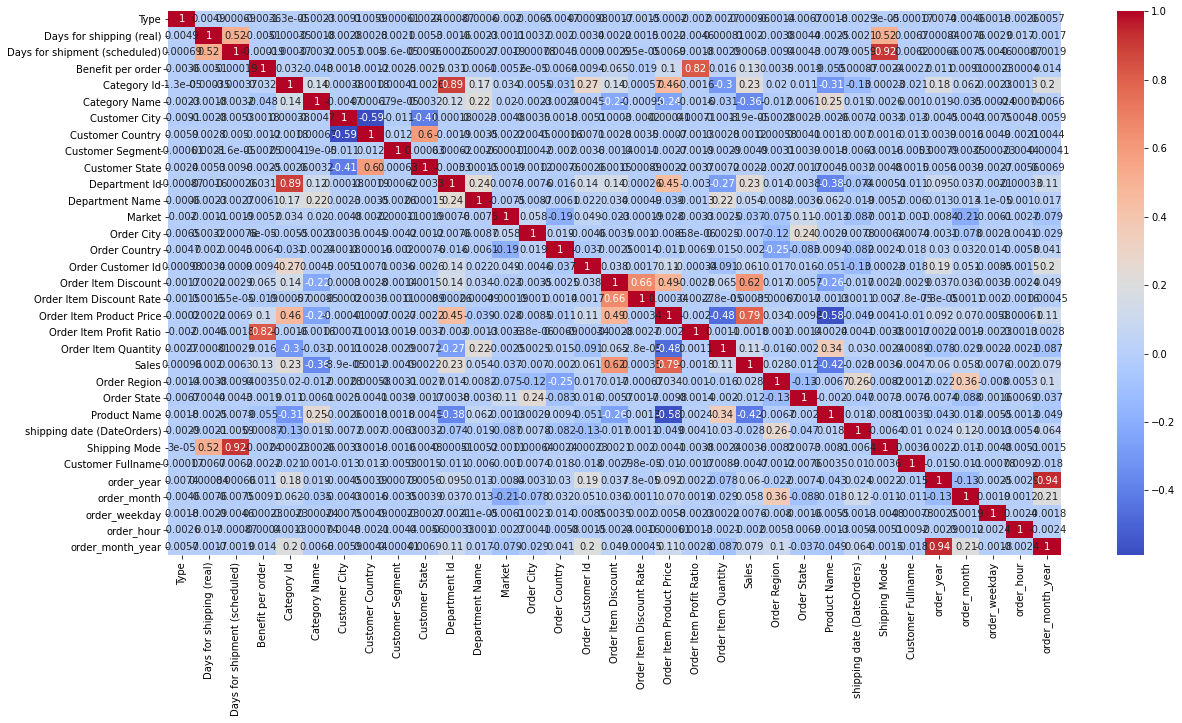

In [12]:
# 热力图展示特征相关性
plt.figure(figsize=(20,10))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
data.shape

In [15]:
# 数据集构造切分
X_data = data.loc[:, data.columns != 'Sales']
y_data = data['Sales']
X_fraud_train, X_fraud_test, y_fraud_train, y_fraud_test = train_test_split(X_data, y_data, test_size=0.2)

X_late = data.loc[:, data.columns != 'Order Item Quantity']
y_late = data['Order Item Quantity']
X_late_train, X_late_test, y_late_train, y_late_test = train_test_split(X_late, y_late, test_size=0.2)

# 数据规范化
sc = StandardScaler()
X_fraud_train = sc.fit_transform(X_fraud_train)
X_fraud_test = sc.transform(X_fraud_test)
X_late_train = sc.transform(X_late_train)
X_late_test = sc.transform(X_late_test)

In [17]:
# 模型评估
def model_stats(model, X_train, X_test, y_train, y_test, name='Fraud'):
  model = model.fit(X_train, y_train)
  y_pred = model.predict(X_test)
  mae = mean_absolute_error(y_pred, y_test)
  mse = mean_squared_error(y_pred, y_test)
  print('\nModel used:', model)
  print('{} MAE: {}'.format(name, mae))
  print('{} MSE: {}'.format(name, mse))

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

In [26]:
# linear regression
model_fraud = LinearRegression()
model_late = LinearRegression()

model_stats(model_fraud, X_fraud_train, X_fraud_test, y_fraud_train, y_fraud_test, 'Sales')
model_stats(model_late, X_late_train, X_late_test, y_late_train, y_late_test, 'Order Item Quantity')


Model used: LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)
Sales MAE: 18.421499901986937
Sales MSE: 952.1313494030667

Model used: LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)
Order Item Quantity MAE: 0.3457185773306181
Order Item Quantity MSE: 0.2803948226491466


In [19]:
model_fraud = RandomForestRegressor()
model_late = RandomForestRegressor()

model_stats(model_fraud, X_fraud_train, X_fraud_test, y_fraud_train, y_fraud_test, 'Sales')
model_stats(model_late, X_late_train, X_late_test, y_late_train, y_late_test, 'Order Item Quantity')


Model used: RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)
Sales MAE: 0.0003913745677055609
Sales MSE: 0.0011931078247922158

Model used: RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, o

In [20]:
model_fraud = XGBRegressor()
model_late = XGBRegressor()

model_stats(model_fraud, X_fraud_train, X_fraud_test, y_fraud_train, y_fraud_test, 'Sales')
model_stats(model_late, X_late_train, X_late_test, y_late_train, y_late_test, 'Order Item Quantity')

[05:14:57] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.

Model used: XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)
Sales MAE: 2.0910539130135812
Sales MSE: 10.799388851505618
[05:15:14] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.

Model used: XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_ra

In [21]:
model_fraud = LGBMRegressor()
model_late = LGBMRegressor()

model_stats(model_fraud, X_fraud_train, X_fraud_test, y_fraud_train, y_fraud_test, 'Sales')
model_stats(model_late, X_late_train, X_late_test, y_late_train, y_late_test, 'Order Item Quantity')


Model used: LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=-1,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
              random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)
Sales MAE: 0.1451677464664655
Sales MSE: 8.9542531373468

Model used: LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=-1,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
              random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)
Order Item 

In [28]:
model_fraud = DecisionTreeRegressor()
model_late = DecisionTreeRegressor()

model_stats(model_fraud, X_fraud_train, X_fraud_test, y_fraud_train, y_fraud_test, 'Sales')
model_stats(model_late, X_late_train, X_late_test, y_late_train, y_late_test, 'Order Item Quantity')


Model used: DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')
Sales MAE: 1.1392155407216447e-11
Sales MSE: 2.8561459739571606e-22

Model used: DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')
Order Item Quantity MAE: 0.0
Order Item Quantity MSE: 0.0


[ 0 25 17 16 30 14 13 12 26 22 27  8  7  6 28 29  3  2  1  9 21 19 31 24
 10  4  5 23 15 11 20 18]


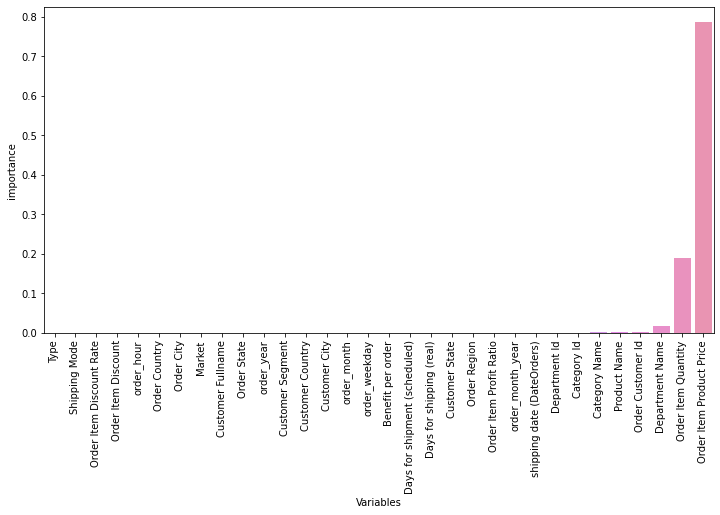

In [29]:
# 根据决策树模型得到Sales的feature_importance
cols = model_fraud.feature_importances_.argsort()
print(cols)
plt.figure(figsize=(12,6))
feat_importance = pd.DataFrame({'Variables': X_data.columns[cols], 'importance': model_fraud.feature_importances_[cols]})
sns.barplot(x='Variables', y='importance', data=feat_importance)
plt.xticks(rotation=90)
plt.show()

[ 0 29 28 27 26 25 24 22 21 19 17 16 30 14 15 12  1  2  3  6 13  7 31  9
 10  8  4  5 23 11 20 18]


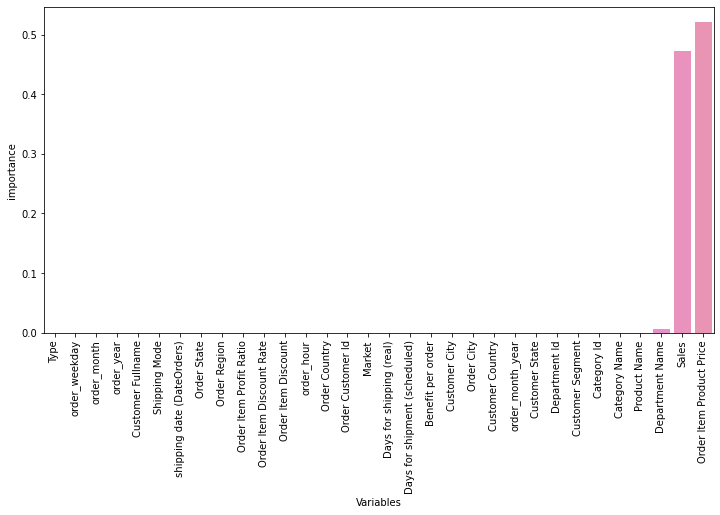

In [30]:
# 根据决策树模型得到Order Item Quantity的feature_importance
cols = model_late.feature_importances_.argsort()
print(cols)
plt.figure(figsize=(12,6))
feat_importance = pd.DataFrame({'Variables': X_late.columns[cols], 'importance': model_late.feature_importances_[cols]})
sns.barplot(x='Variables', y='importance', data=feat_importance)
plt.xticks(rotation=90)
plt.show()

In [31]:
data.to_csv('SupplyChain_clean.csv')